In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

In [175]:
dark = sns.color_palette(palette='Paired')

In [179]:
from collections import defaultdict

def parse_data(filename):
    data = {}
    timestep = None

    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('#'):
                continue  # Ignore comments
            line_parts = line.split()
            if len(line_parts) == 2 and line_parts[0].isdigit():
                if float(line_parts[0]) % 100 == 0 and float(line_parts[1]) == 83:
                    timestep = int(line_parts[0])
                    data[timestep] = []
                else:
                    x, y = float(line_parts[0]), float(line_parts[1])
                    data[timestep].append((x, y))
    
    return data

def compute_averages(data):
    y_sums = defaultdict(float)
    y_counts = defaultdict(int)

    for timestep, values in data.items():
        for x, y in values:
            y_sums[x] += y
            y_counts[x] += 1

    # Compute averages
    averages = {x: y_sums[x] / y_counts[x] for x in y_sums}
    return averages
def plot_averages(averages):
    x_values = sorted(averages.keys())
    y_values = [averages[x] for x in x_values]

    plt.figure()
    plt.plot(x_values, y_values, marker='o', label="Averaged Data")
    plt.title("Averaged Y Data Over All Timesteps")
    plt.xlabel("X values")
    plt.ylabel("Average Y values")
    plt.legend()
    plt.show()

def scale_x_values(data):
    scaled_data = {}
    for timestep, values in data.items():
        scaled_values = []
        for x, y in values:
            scaled_x = (x - 1) * 80 / (165 - 1)  # Scale x to the range [0, 80]
            scaled_values.append((scaled_x, y))
        scaled_data[timestep] = scaled_values
    return scaled_data

filename = "xbincounts.dat"  # Replace with your file name
parsed_data = parse_data(filename)
# parsed_data = scale_x_values(parsed_data)
avg = compute_averages(parsed_data)

def compute_averages_as_array(data):
    y_sums = defaultdict(float)
    y_counts = defaultdict(int)

    for timestep, values in data.items():
        for x, y in values:
            y_sums[x] += y
            y_counts[x] += 1

    # Compute averages
    averages = {x: y_sums[x] / y_counts[x] for x in y_sums}

    # Convert to sorted NumPy array (for slicing)
    x_sorted = sorted(averages.keys())
    y_sorted = [averages[x] for x in x_sorted]
    x_array = np.array(x_sorted)
    y_array = np.array(y_sorted)

    return x_array, y_array/(20.656**2)


nparray = compute_averages_as_array(parsed_data)

def compute_rolling_average(y_values, window_size=5):
    window = np.ones(window_size) / window_size
    rolling_avg = np.convolve(y_values, window, mode='same')  # Apply convolution
    return rolling_avg

rolling = compute_rolling_average(nparray[1],1)



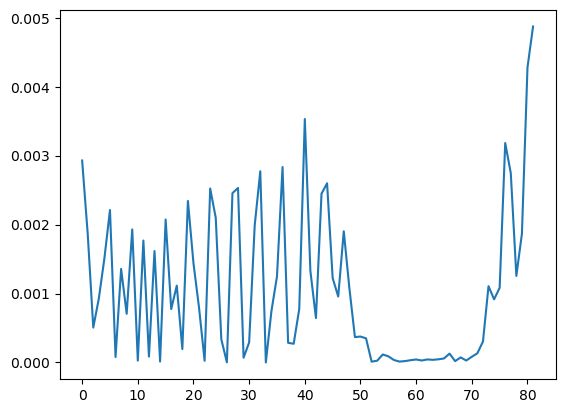

81 40
0.27717461497415374


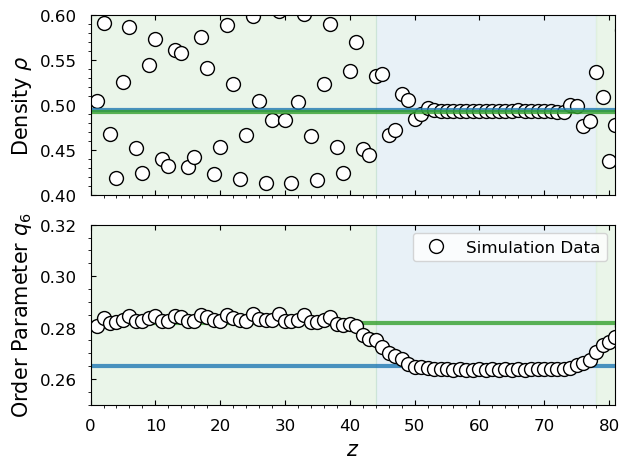

In [196]:
file_path = 'orientorder_z_profile_avg.dat'

with open(file_path, 'r') as file:
    lines = file.readlines()

chunk_data = {}
dens_data = {}
for line in lines:
    if re.match(r'^\d+\s+\d+\s+[\d.]+', line):
        continue  

    match = re.match(r'\s*(\d+)\s+[\d.]+\s+([\d.]+)\s+([\d.]+)', line)
    if match:
        chunk_id = int(match.group(1))
        value = float(match.group(3))
        particles = float(match.group(2))
        
        if chunk_id not in chunk_data:
            chunk_data[chunk_id] = []
            dens_data[chunk_id] = []
        chunk_data[chunk_id].append(value)
        dens_data[chunk_id].append(particles/(20.658272712879**2))

averages = {chunk_id: sum(values)/len(values) for chunk_id, values in chunk_data.items()}

data_oparam = pd.DataFrame(list(averages.items()), columns=['z', 'oparam'])

#plt.plot(np.abs(np.diff(data_oparam.oparam)), 's-.')


x = np.abs(np.diff(data_oparam.oparam))
plt.plot(x)
plt.show()
plt.clf

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
xmax1, xmax2 = np.argsort(x, axis=0)[-1], np.argsort(x, axis=0)[-3]



print(xmax1,xmax2)


xmax1 = 78
xmax2 = 44

ax2.fill_between([xmax2,xmax1], 1, alpha=0.1)
ax2.fill_between([0,xmax2], 1, alpha=0.1, color=dark[3])
ax2.fill_between([xmax1, len(data_oparam.oparam)], 1, alpha=0.1, color=dark[3])



plt.ylim(0.25,0.32)
plt.xlim(0,81)
fluido =np.average(data_oparam.oparam[xmax2:xmax1])
solido = np.average(np.concatenate((data_oparam.oparam[:xmax2], data_oparam.oparam[xmax1:])))
np.average(data_oparam.oparam[0:xmax2])
print(np.average(data_oparam.oparam[xmax1+1:-1]))

ax2.axhline(fluido, color=dark[1], linewidth=3, alpha=0.8)
ax2.axhline(solido, color=dark[3], linewidth=3, alpha=0.8)
# ax2.axhline(np.max(data_oparam.oparam), color=dark[5], linewidth=3, alpha=0.8)


ax2.plot(data_oparam.z,data_oparam.oparam,'o', markersize=10, markerfacecolor='white', color='k', label=r'Simulation Data')


ax1.plot(nparray[0],rolling,'o', markersize=10, markerfacecolor='white', color='k', label=r'Simulation Data')
ax1.set_ylim(0.4,0.6)
ax1.fill_between([xmax2,xmax1], 1, alpha=0.1)
ax1.fill_between([0,xmax2], 1, alpha=0.1, color=dark[3])
ax1.fill_between([xmax1, len(nparray[1])], 1, alpha=0.1, color=dark[3])
fluido =np.average(nparray[1][xmax2:xmax1])
solido = np.average(np.concatenate((nparray[1][:xmax2], nparray[1][xmax1:])))
ax1.axhline(fluido, color=dark[1], linewidth=3, alpha=0.8)
ax1.axhline(solido, color=dark[3], linewidth=3, alpha=0.8)
ax1.set_ylabel(r'Density $\rho$', fontsize=15)


plt.ylabel(r'Order Parameter $q_6$', fontsize=15)
plt.xlabel(r'$z$', fontsize=15)
ax1.minorticks_on()
ax2.minorticks_on()
ax1.tick_params('both',direction='in',top=True,pad=10,labelsize=12)
ax2.tick_params('both',direction='in',top=True,pad=10,labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

perfect bcc would be 0.509 https://arxiv.org/pdf/1209.6180

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.         0.03199344 0.04410067 ... 1.14485276 1.14552972 1.1461784 ]
2.894209400702541e-06


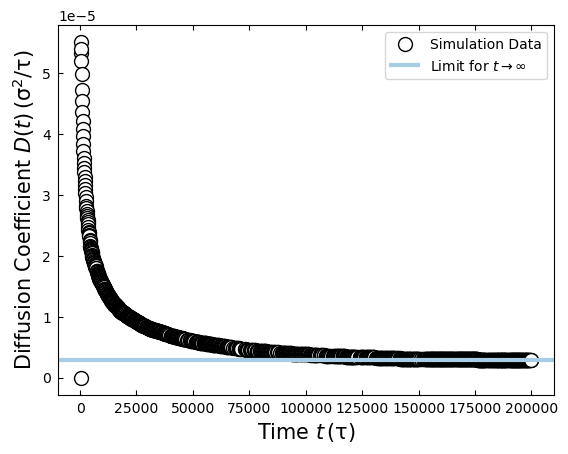

In [263]:
# Extract the data for each timestep by iterating through the file content
from collections import defaultdict

file_path = 'orientorder_z_profile_avg.dat'

with open(file_path, 'r') as file:

    file_content = file.readlines()

timestep_data = defaultdict(list)
interface = []
timesteps = []
r2 = []

current_timestep = None
for line in file_content:
    parts = line.strip().split()
    if len(parts) == 3 and parts[0].isdigit():
        current_timestep = int(parts[0])
    elif current_timestep is not None and len(parts) == 4:
        timestep_data[current_timestep].append([float(p) for p in parts])

timestep_dataframes = {ts: pd.DataFrame(data, columns=["Chunk", "Coord1", "Ncount", "q6"]) 
                       for ts, data in timestep_data.items()}

sample_data = {ts: df.head() for ts, df in timestep_dataframes.items()}

for ts, df in timestep_dataframes.items():
    # plt.plot(df["Chunk"], df["q6"], marker='o', label=f'Timestep {ts}')
    
    if np.argmin(np.diff(df["q6"])) > 5 and np.argmin(np.diff(df["q6"])) < 75:
        interface.append(np.argmin(np.diff(df["q6"])))
        timesteps.append(ts)
    else:
        pass
xc = np.cumsum(abs(np.array(interface))**2)/len(interface)
N = len(interface)
r2 = np.sqrt((xc - xc[0]) / N)
print(r2)
timesteps = np.array(timesteps)
dcoef = r2/(2*timesteps)
plt.ylabel(r'Diffusion Coefficient $D(t) \, (\mathrm{\sigma^2/\tau})$', fontsize=15)
plt.xlabel(r'Time $t  \, (\mathrm{\tau})$', fontsize=15)
plt.tick_params('both',direction='in',top=True,pad=5,labelsize=10)
plt.legend(fontsize=12)
plt.plot(timesteps,dcoef, 'o', markersize=10, color='k', markerfacecolor='w', label='Simulation Data')
plt.axhline(np.average(dcoef[-100:-1]), linewidth=3,color=dark[0],label=r'Limit for $t \rightarrow \infty$')

plt.legend()
print(np.average(dcoef[-100:-1]))
# plt.plot(x,0.00000501*x+0.15)